In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [24]:
#read in the data
df_rural = pd.read_csv(f'data/2020_rural_cleaned.csv')
df_rural

,date,pm25,pm10,o3,no2,so2,co,city
0,01/01/2020,282,136,2,14,16,15,vapi
1,02/01/2020,223,139,2,11,23,17,vapi
2,03/01/2020,230,134,2,17,40,15,vapi
3,04/01/2020,217,115,2,12,49,15,vapi
4,05/01/2020,191,161,2,10,35,16,vapi
...,...,...,...,...,...,...,...,...
1255,24/07/2020,48,27,7,2,8,3,guwahati
1256,25/07/2020,56,29,9,1,8,2,guwahati
1257,26/07/2020,70,34,8,4,8,4,guwahati
1258,27/07/2020,74,34,9,4,8,3,guwahati


In [35]:
column_names = df_rural.columns.values
column_names[0] = 'Date'
column_names[7] = 'City'
df_rural.columns = column_names

# clean up: fix date column and filter so that just this year's data is included
df_rural.Date = pd.to_datetime(df_rural.Date, format = '%d/%m/%Y') # need the format string to specify which is the month and which is the year
df_rural['month_num'] = pd.DatetimeIndex(df_rural['Date']).month
df_rural['month_name'] = df_rural.Date.dt.month_name()
pollutant=['pm25','pm10','co','so2','o3','no2']
for i in pollutant:
    df_rural[i]=df_rural[i].replace(0,df_rural[i].mean())
df_rural.dtypes


print(df_rural.shape)
# just keep this year's data, discard everything else

#print(df_rural.shape)
print(df_rural['City'].unique())

(1260, 10)
['vapi' 'kota' 'mussoorie' 'jabalpur' 'coimbatore' 'guwahati']


In [36]:
pollutant_who = {}
pollutant_who['co']   = 0
pollutant_who['no2']  = 0
pollutant_who['o3']   = 100 ##  8-hour mean
pollutant_who['pm10'] = 50
pollutant_who['pm25'] = 25
pollutant_who['so2']  = 20  

## annual in 'industrial, residential, rural, others' areas
pollutant_naaqs = {}
pollutant_naaqs['co']   = 2   ##  8-hour mean
pollutant_naaqs['no2']  = 80
pollutant_naaqs['o3']   = 100 ##  8-hour mean
pollutant_naaqs['pm10'] = 100
pollutant_naaqs['pm25'] = 60
pollutant_naaqs['so2']  = 80  

# Dates 
start='2020-01-01'
end='2020-07-28'
pollutant_who['pm25']

25

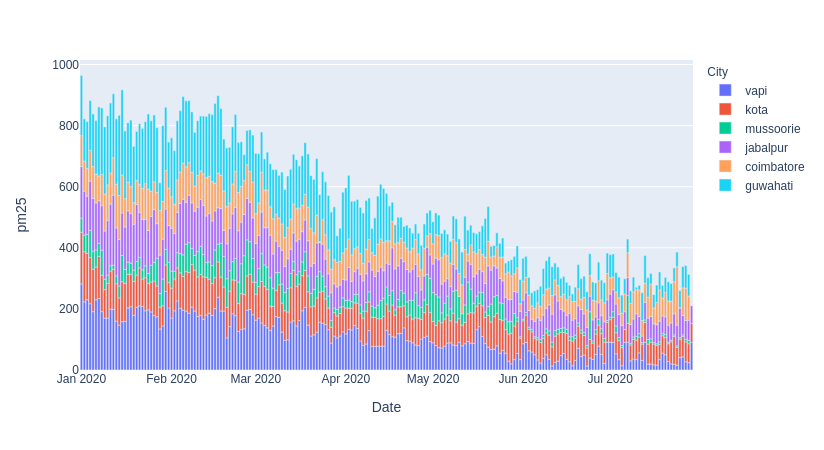

In [37]:
fig = px.bar(df_rural,'Date','pm25',color='City')
fig.show()
fig.write_image(f'images/rural_pm2.5_bar.png',width=1500,height=600)

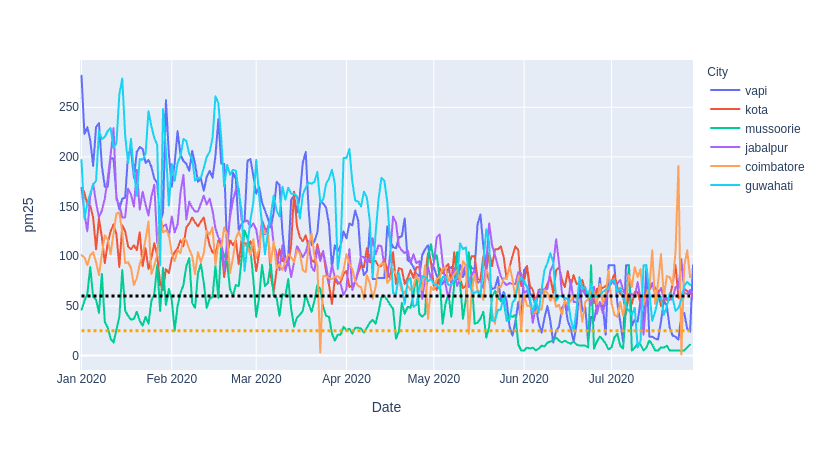

In [38]:
fig=px.line(df_rural,'Date','pm25',color='City')
fig.add_shape(type="line",
            x0=start,
            y0=25,
            x1=end,
            y1=25,
            line=dict(
                color="orange",
                width=3,
                dash="dot",
            ))
fig.add_shape(type="line",
            x0=start,
            y0=60,
            x1=end,
            y1=60,
            line=dict(
                color="black",
                width=3,
                dash="dot",
            ))
fig.show()
fig.write_image(f'images/rural_pm2.5_allcity_line.png',width=1500,height=600)

In [39]:
df_reduced=df_rural[df_rural['City'].isin(['mussoorie','coimbatore','vapi','kota','guwahati'])]

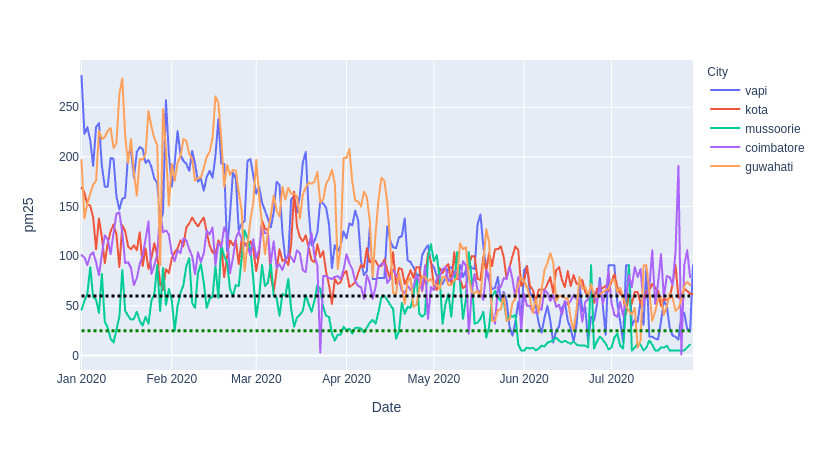

In [40]:
fig=px.line(df_reduced,'Date','pm25',color='City')
fig.add_shape(type="line",
            x0=start,
            y0=25,
            x1=end,
            y1=25,
            line=dict(
                color="green",
                width=3,
                dash="dot",
            ))
fig.add_shape(type="line",
            x0=start,
            y0=60,
            x1=end,
            y1=60,
            line=dict(
                color="black",
                width=3,
                dash="dot",
            ))
fig.show()
fig.write_image(f'images/rural_pm2.5_3city_line.png',width=1500,height=600)

In [54]:
df_reduced=df_rural[df_rural['City'].isin(['mussoorie','coimbatore'])]


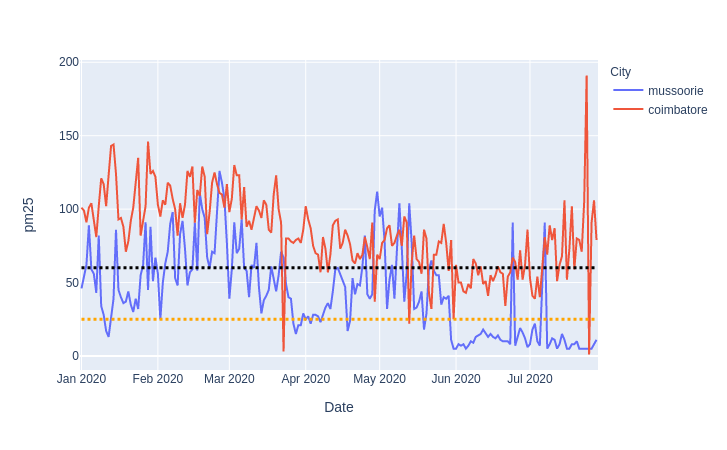

In [55]:
fig=px.line(df_reduced,'Date','pm25',color='City')
fig.add_shape(type="line",
            x0='2020-01-01',
            y0=25,
            x1='2020-07-28',
            y1=25,
            line=dict(
                color="orange",
                width=3,
                dash="dot",
            ))
fig.add_shape(type="line",
            x0='2020-01-01',
            y0=60,
            x1='2020-07-28',
            y1=60,
            line=dict(
                color="black",
                width=3,
                dash="dot",
            ))
fig.show()
fig.write_image(f'images/rural_pm2.5_2city_line.png',width=1500,height=600)

In [56]:
df_reduced=df_rural[df_rural['City'].isin(['mussoorie','vapi'])]


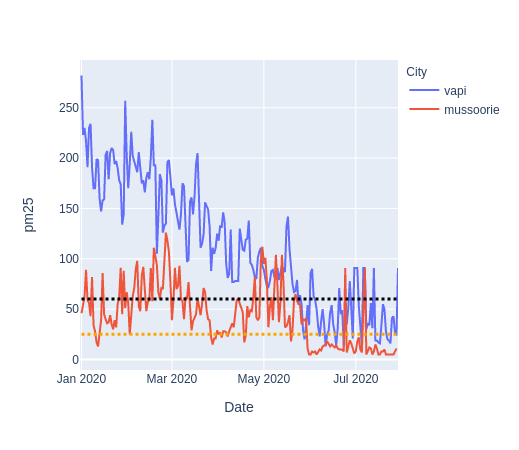

In [57]:
fig=px.line(df_reduced,'Date','pm25',color='City')
fig.add_shape(type="line",
            x0='2020-01-01',
            y0=25,
            x1='2020-07-28',
            y1=25,
            line=dict(
                color="orange",
                width=3,
                dash="dot",
            ))
fig.add_shape(type="line",
            x0='2020-01-01',
            y0=60,
            x1='2020-07-28',
            y1=60,
            line=dict(
                color="black",
                width=3,
                dash="dot",
            ))
fig.show()
fig.write_image(f'images/rural_pm2.5_hl-indst_line.png',width=1500,height=600)

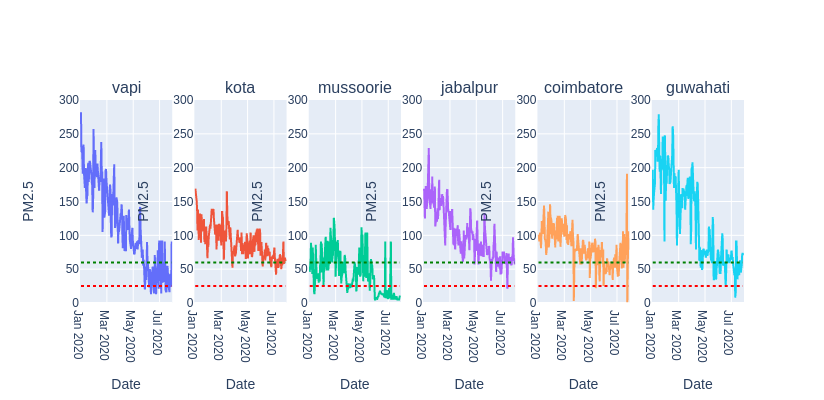

In [43]:
city=['vapi', 'kota', 'mussoorie', 'jabalpur', 'coimbatore', 'guwahati']
pollutant=['pm25','pm10','co','so2','o3','no2']

fig = make_subplots(
rows=1, cols=6,
subplot_titles=('vapi', 'kota', 'mussoorie', 'jabalpur', 'coimbatore', 'guwahati'))
for l,i in enumerate(city):
    dff=df_rural[df_rural['City'].isin([i])]
    fig.add_trace(go.Scatter(x=dff['Date'], y=dff['pm25']),row=1, col=l+1)
    fig.add_shape(go.layout.Shape(type="line", x0=start, y0=pollutant_who['pm25'], x1=end, y1=pollutant_who['pm25'],
                                  line=dict(color='red', width=2,dash='dot'),),row=1,col=l+1)
    fig.add_shape(go.layout.Shape(type="line", x0=start, y0=pollutant_naaqs['pm25'], x1=end, y1=pollutant_naaqs['pm25'],
                                  line=dict(color='green', width=2,dash='dot'),),row=1,col=l+1)
    fig.update_xaxes(title_text="Date", row=1, col=l+1)
    fig.update_yaxes(title='PM2.5',range=[0, 300], row=1, col=l+1)
fig.update_layout(height=400, width=2300,showlegend=False)
fig.update_layout(yaxis=dict(range=[0,300]))
fig.show()
fig.write_image(f'images/rural_pm2.5_all_cities.png')

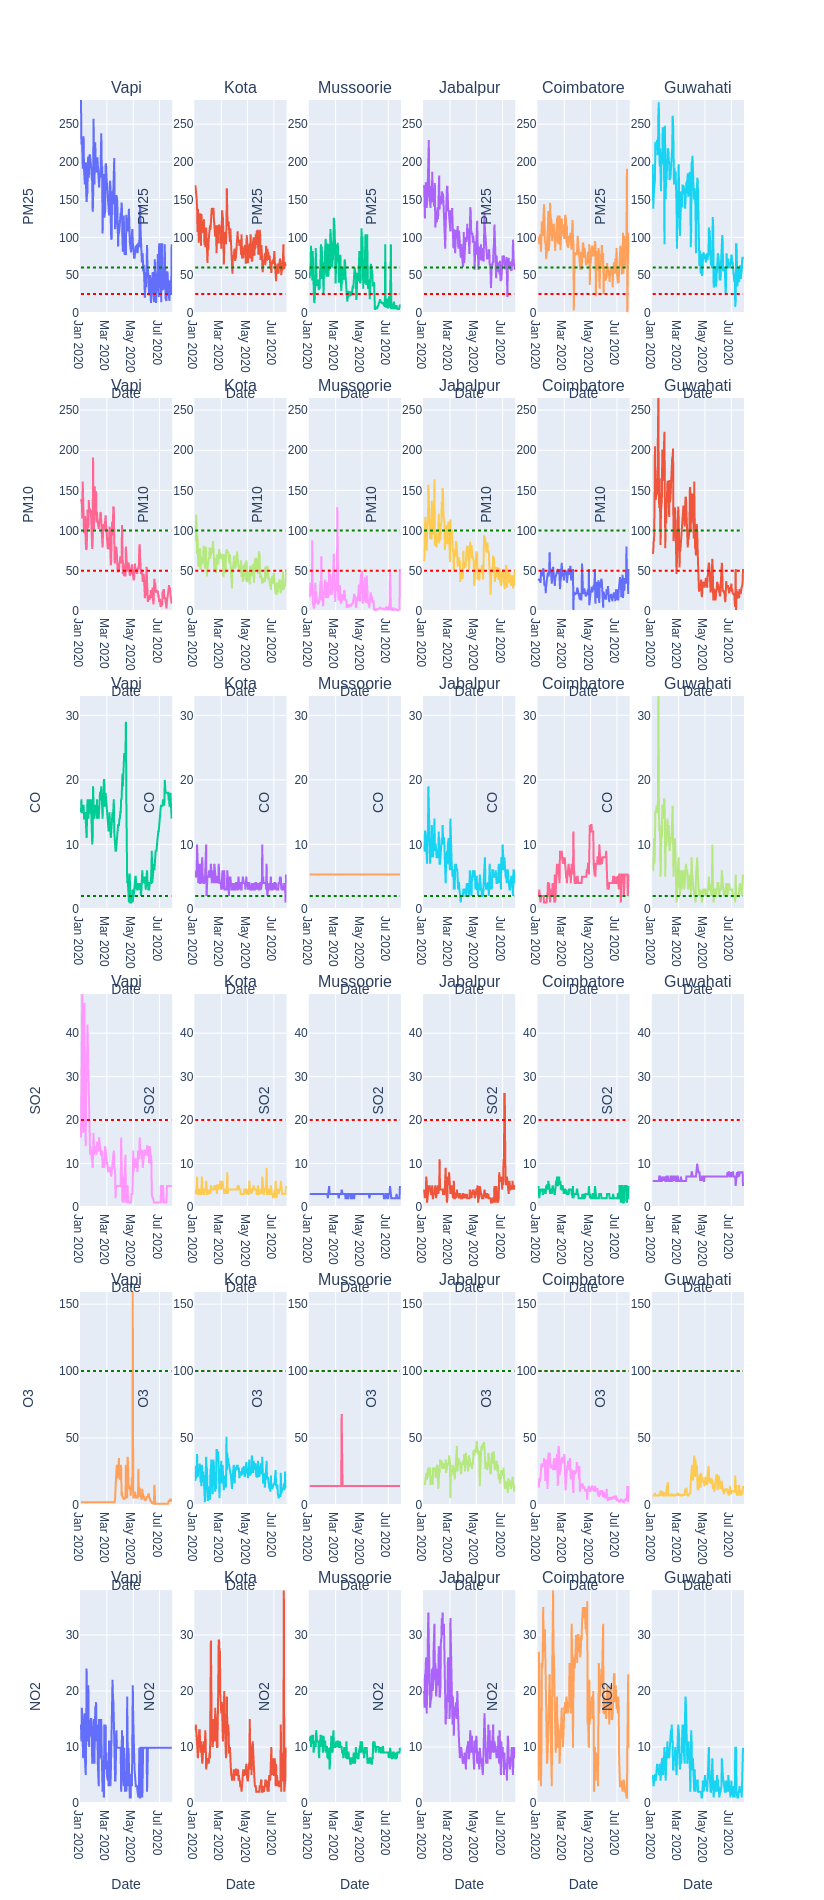

In [45]:
city=['vapi', 'kota', 'mussoorie', 'jabalpur', 'coimbatore', 'guwahati']
pollutant=['pm25','pm10','co','so2','o3','no2']
polmax=[]
for i in pollutant:
    polmax.append(df_rural[i].max())
title=[]
[title.append(i.capitalize()) for _ in range(6) for i in city]
fig = make_subplots(
rows=6, cols=6,
subplot_titles=title,
vertical_spacing=0.05)
for m,j in enumerate(pollutant):
    for l,i in enumerate(city):
        dff=df_rural[df_rural['City'].isin([i])]
        fig.add_trace(go.Scatter(x=dff['Date'], y=dff[j]),row=m+1, col=l+1)
        if pollutant_who[j]:
            fig.add_shape(go.layout.Shape(type="line", x0=start, y0=pollutant_who[j], x1=end, y1=pollutant_who[j],
                                          line=dict(color='red', width=2,dash='dot'),),row=m+1,col=l+1)
        if pollutant_naaqs[j]:
            fig.add_shape(go.layout.Shape(type="line", x0=start, y0=pollutant_naaqs[j], x1=end, y1=pollutant_naaqs[j],
                                          line=dict(color='green', width=2,dash='dot'),),row=m+1,col=l+1)
        fig.update_yaxes(title=j.upper(),range=[0,polmax[m]], row=m+1, col=l+1)
        fig.update_xaxes(title="Date",row=m+1, col=l+1)
fig.update_layout(height=1900, width=2000,showlegend=False)
fig.show()
fig.write_image(f'images/rural_all_allcities.png')        

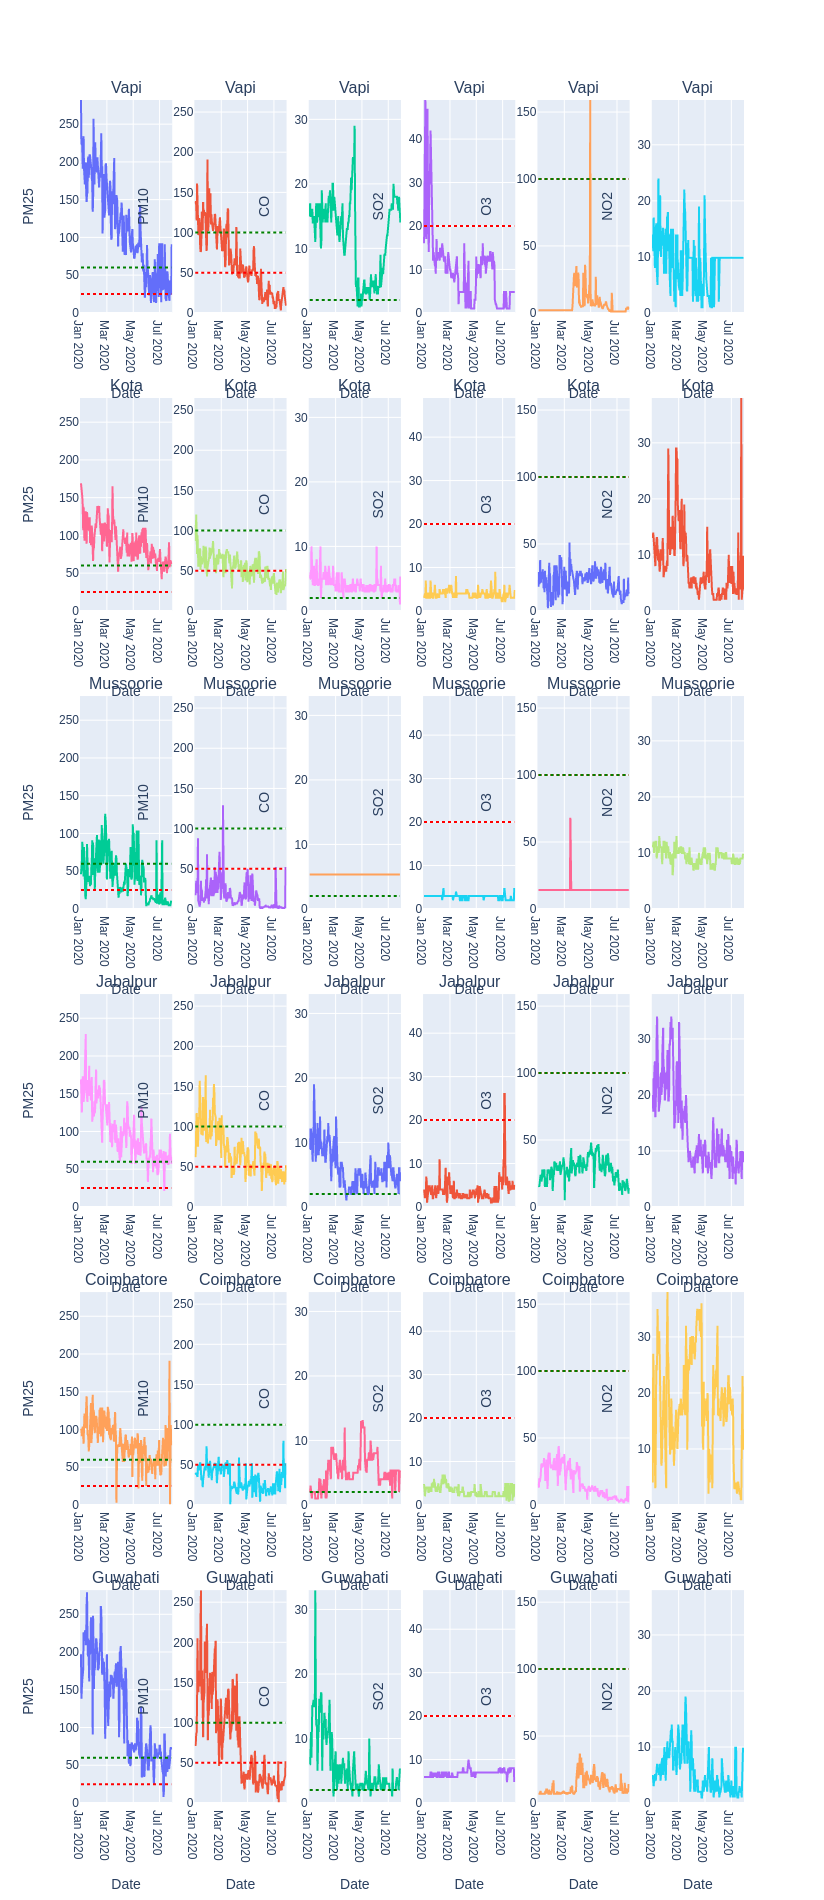

In [46]:
city=['vapi', 'kota', 'mussoorie', 'jabalpur', 'coimbatore', 'guwahati']
pollutant=['pm25','pm10','co','so2','o3','no2']
title=[]
for i in city:
    for j in pollutant:
        title.append(i.capitalize())
polmax=[]
for i in pollutant:
    polmax.append(df_rural[i].max())
fig = make_subplots(
rows=6, cols=6,
subplot_titles=title,
vertical_spacing=0.05)
for m,i in enumerate(city):
    for n,j in enumerate(pollutant):
        dff=df_rural[df_rural['City'].isin([i])]
        fig.add_trace(go.Scatter(x=dff['Date'], y=dff[j]),row=m+1, col=n+1)
        if pollutant_who[j]:
            fig.add_shape(go.layout.Shape(type="line", x0=start, y0=pollutant_who[j], x1=end, y1=pollutant_who[j],
                                            line=dict(color='red', width=2,dash='dot'),),row=m+1,col=n+1)
        if pollutant_naaqs[j]:
            fig.add_shape(go.layout.Shape(type="line", x0=start, y0=pollutant_naaqs[j], x1=end, y1=pollutant_naaqs[j],
                                            line=dict(color='green', width=2,dash='dot'),),row=m+1,col=n+1)
        fig.update_yaxes(title=j.upper(),range=[0, polmax[m]], row=m+1, col=l+1)
        fig.update_yaxes(title=j.upper(),range=[0, polmax[n]], row=m+1, col=n+1)
        fig.update_xaxes(title="Date",row=m+1, col=n+1)
fig.update_layout(height=1900, width=2000,showlegend=False)
fig.show()        
fig.write_image(f'images/rural_all_allcity_trans.png')